In [1]:
# Load data
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


train_df = pd.read_csv('./train_data/1.csv')
test_df = pd.read_csv('./test_data/1.csv')

# Training set and test set size
print(train_df.shape,test_df.shape)

(423, 13) (282, 13)


In [2]:
# View the first row of data
train_df.head(1)

,position,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,label
0,1.0,0.001131,0.884615,0.00112,0.001113,0.677632,0.841463,0.765152,0.787402,0.29375,0.298077,0.276163,0.648148


In [3]:
test_df.head(1)

,position,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,label
0,1.0,0.0023,0.910256,0.001984,0.002051,0.578947,0.865854,0.651515,0.661417,0.571875,0.573718,0.543605,0.666667


In [4]:
# Does it contain missing values
train_df.isna().sum()

position    0
F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
label       0
dtype: int64

In [5]:
test_df.isna().sum()

position    0
F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
label       0
dtype: int64

In [6]:
# Data details
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  423 non-null    float64
 1   F1        423 non-null    float64
 2   F2        423 non-null    float64
 3   F3        423 non-null    float64
 4   F4        423 non-null    float64
 5   F5        423 non-null    float64
 6   F6        423 non-null    float64
 7   F7        423 non-null    float64
 8   F8        423 non-null    float64
 9   F9        423 non-null    float64
 10  F10       423 non-null    float64
 11  F11       423 non-null    float64
 12  label     423 non-null    float64
dtypes: float64(13)
memory usage: 43.1 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  282 non-null    float64
 1   F1        282 non-null    float64
 2   F2        282 non-null    float64
 3   F3        282 non-null    float64
 4   F4        282 non-null    float64
 5   F5        282 non-null    float64
 6   F6        282 non-null    float64
 7   F7        282 non-null    float64
 8   F8        282 non-null    float64
 9   F9        282 non-null    float64
 10  F10       282 non-null    float64
 11  F11       282 non-null    float64
 12  label     282 non-null    float64
dtypes: float64(13)
memory usage: 28.8 KB


In [8]:
train_df.columns

Index(['position', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'label'],
      dtype='object')

In [9]:
train_label = train_df[['label']]
train_data = train_df.drop(['label','position'],axis=1)

test_label = test_df[['label']]
test_data = test_df.drop(['label','position'],axis=1)

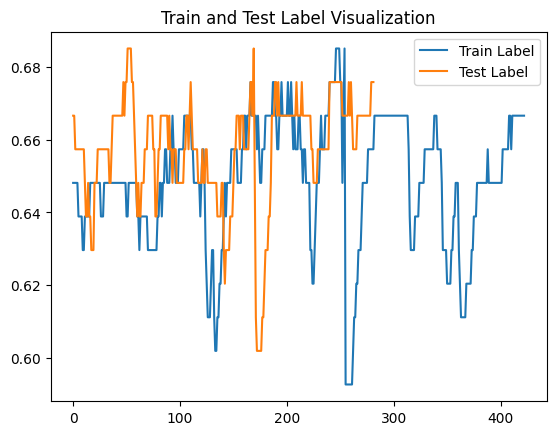

In [11]:
# Polyline visualization of train_label and test_label
plt.plot(train_label, label='Train Label')
plt.plot(test_label, label='Test Label')
plt.legend()
plt.title('Train and Test Label Visualization')
plt.show()

XGBoost is a gradient boosting tree method built on decision trees. Gradient boosted trees are an ensemble learning method that improves the predictive performance of a model by incrementally building multiple decision trees. Each tree attempts to correct the prediction error of the previous tree.

In [19]:
# Training using XGBoost
model = xgb.XGBRegressor()
model.fit(train_data, train_label)

# predict
predictions = model.predict(test_data)

# Calculate MSE, MAE and R^2
mse = mean_squared_error(test_label, predictions)
mae = mean_absolute_error(test_label, predictions)
r2 = r2_score(test_label, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 5.312101849822254e-05
Mean Absolute Error (MAE): 0.004759068717034677
R-squared (R^2): 0.7700944686141556


MSE (Mean Squared Error) is an indicator that measures the mean squared difference between the predicted value and the actual value. It calculates the difference between the model's predicted and actual values and averages the squares of these differences. The smaller the MSE value, the better, indicating that the model's predictions fit better with the actual values.

MAE (Mean Absolute Error) is an indicator that measures the average absolute difference between the predicted value and the actual value. It calculates the average of the absolute differences between the model's predicted and actual values. The smaller the MAE value, the better, indicating that the model's predictions fit better with the actual values.


The coefficient of determination (R2) is an index that measures the fitness of the model. It indicates the proportion of the variance of the model's explanatory variables in the total variance. The value range of R-squared is usually between 0 and 1. The closer to 1, the better the model fits the data.

Taken together, the MSE and MAE values are relatively small, and the R-squared value is close to 1, which indicates that the model performs well on this data set and can fit the target variable well.

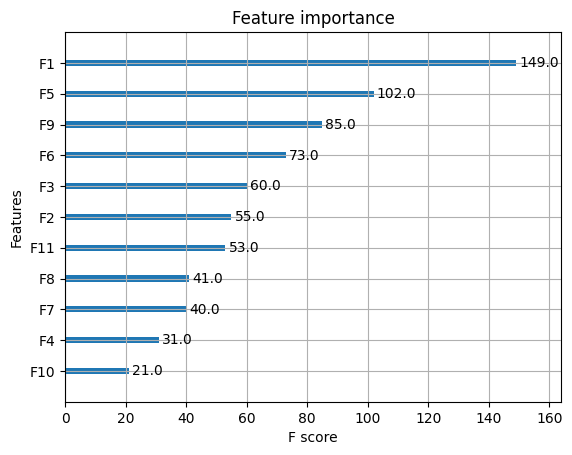

In [20]:
# Feature importance visualization
xgb.plot_importance(model)
plt.show()

Visualizing feature importance is a method for understanding how much each feature (input variable) in a machine learning model contributes to the model's predictions. This visualization provides information about which features have the greatest impact on the model's performance, aiding in feature selection and explaining model behavior. In a bar chart, each feature is represented as a column on the horizontal axis, and the height of the column represents the importance score of the feature. Typically, features with higher importance scores have higher bars.

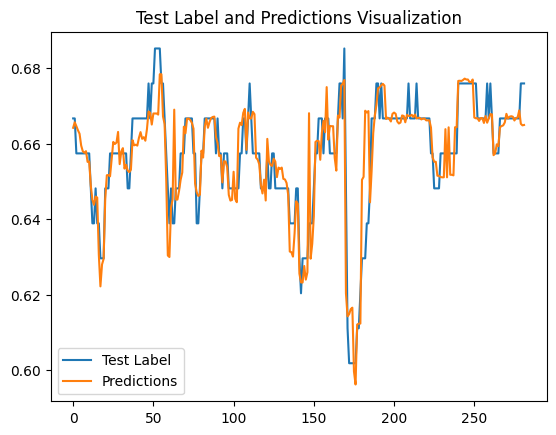

In [21]:
# Perform polyline visualization on the predicted label and test_label
plt.plot(test_label, label='Test Label')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('Test Label and Predictions Visualization')
plt.show()